In [29]:
import networkx as nx

G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from(["u","v"])
print(G.nodes())

G.add_edge(1,2)
G.add_edge("u","v")
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])
G.add_edge("u","w")
print(G.edges())

G.remove_node(2)
G.remove_nodes_from([4,5])
print(G.nodes())
G.remove_edge(1,3)
print(G.edges())
G.remove_edges_from([(1,2),('u', 'v')])
print(G.edges())
print(G.number_of_nodes())
print(G.number_of_edges())

[1, 2, 3, 'u', 'v']
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')]
[1, 3, 'u', 'v', 6, 'w']
[(1, 6), ('u', 'v'), ('u', 'w')]
[(1, 6), ('u', 'w')]
6
2


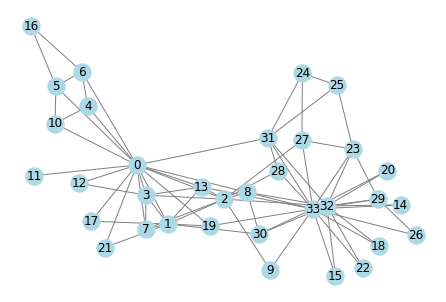

In [30]:
G=nx.karate_club_graph()

import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.savefig("karate_graph.pdf")

In [33]:
print(G.degree()) #for dict
print(G.degree()[33])
print(G.degree(33))
print(G.number_of_nodes())
print(G.number_of_edges())
G.degree(0) is G.degree()[0]

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]
17
17
34
78


True

#Erdos-Renyi(ER) a simplest form of random graph
# N stand for number of nodes
# p stand for probablity of connection

20


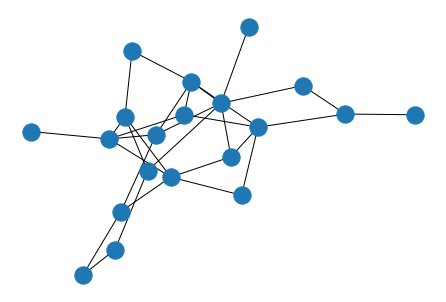

In [69]:
from scipy.stats import bernoulli

bernoulli.rvs(p=0.2) # p for probablity

N =20
p= 0.2

#create an empty graph
#add all N nodes in the graph
# loop over all pair of nodes
    # add an edge with prob p

def er_graph(N,p):    
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p)== True:
                G.add_edge(node1,node2)
                pass
    return G
    
print(G.number_of_nodes()) 
nx.draw(G)


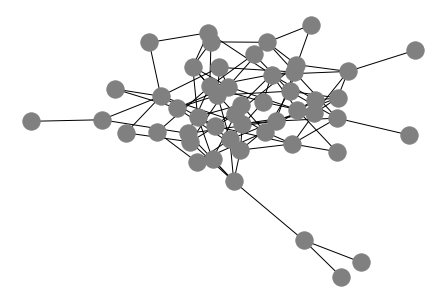

In [101]:
nx.draw(er_graph(50,0.08), nodes_size=40, node_color="gray")

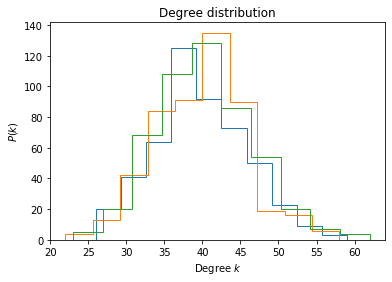

In [111]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")
    
G1 = er_graph(500,0.08)
plot_degree_distribution(G1)
G2 = er_graph(500,0.08)
plot_degree_distribution(G2)
G3 = er_graph(500,0.08)
plot_degree_distribution(G3)

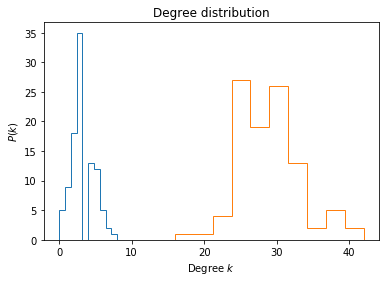

In [119]:
G4 = er_graph(100,0.03)
plot_degree_distribution(G4)
G5 = er_graph(100,0.30)
plot_degree_distribution(G5)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08
Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


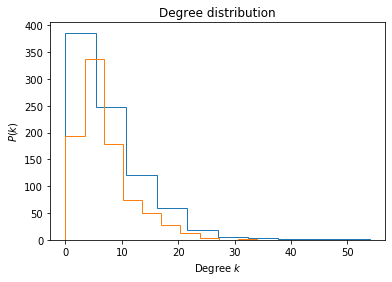

In [130]:
import numpy as np

A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

G1 =nx.to_networkx_graph(A1)
G2 =nx.to_networkx_graph(A2)

def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))
    
basic_net_stats(G1)
basic_net_stats(G2)
plot_degree_distribution(G1)
plot_degree_distribution(G2)

In [161]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

gen = connected_component_subgraphs(G1)
g=gen.__next__()
print(type(g))
print(g.number_of_nodes())


<class 'networkx.classes.graph.Graph'>
825


3

In [168]:
gen = connected_component_subgraphs(G1)
G1_LCC = max(connected_component_subgraphs(G1), key=len)
G2_LCC = max(connected_component_subgraphs(G2), key=len)

print(len(G1_LCC) == G1_LCC.number_of_nodes())
print(len(G1_LCC) )
print(len(G2_LCC) )
print( G1_LCC.number_of_nodes()/ G1.number_of_nodes())
print( G2_LCC.number_of_nodes()/ G2.number_of_nodes())

True
825
810
0.9786476868327402
0.9236031927023945


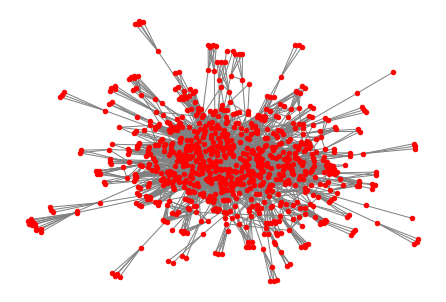

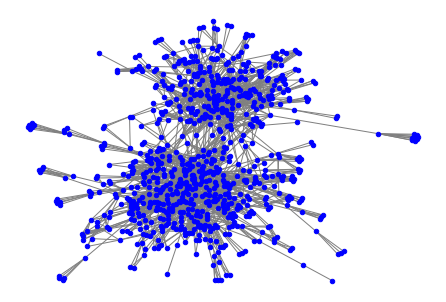

In [171]:
plt.figure()
nx.draw(G1_LCC, node_color="red", edge_color="gray", node_size= 20)
plt.savefig("village1.pdf")

plt.figure()
nx.draw(G2_LCC, node_color="blue", edge_color="gray", node_size= 20)
plt.savefig("village2.pdf")